In [1]:
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alpaca_api_key = "PKJYB527YAQVS4J907RJ"
alpaca_secret_key = "zb5bvTpu8cWaKIgAbDCESouV9MX0qn4RXiQzS5n8"

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Set the tickers
tickers = ["JPM"]

In [5]:
# Set timeframe to 5 days
timeframe = "1Day"

In [6]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2014-02-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-02-07", tz="America/New_York").isoformat()

In [7]:
# Get closing prices for stock from the last year
df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

def signal_creator_5(row):
    percent_diff = (row['close'] - row['shifted_close_5']) / row['shifted_close_5']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0
    
def signal_creator_15(row):
    percent_diff = (row['close'] - row['shifted_close_15']) / row['shifted_close_15']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

def signal_creator_30(row):
    percent_diff = (row['close'] - row['shifted_close_30']) / row['shifted_close_30']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

df = df.drop(columns=['symbol'])

# 5 day shift
df['shifted_close_5'] = df['close'].shift(periods=5)
df['signal_5'] = 0
print(df)
df['signal_5'] = df.apply(signal_creator_5, axis=1)

# 15 day shift
df['shifted_close_15'] = df['close'].shift(periods=15)
df['signal_15'] = 0
print(df)
df['signal_15'] = df.apply(signal_creator_15, axis=1)

# 30 day shift
df['shifted_close_30'] = df['close'].shift(periods=30)
df['signal_30'] = 0
df['signal_30'] = df.apply(signal_creator_30, axis=1)

# Columns and NA drops to prevent data leakege
df.dropna(inplace=True)
df.drop(columns=['shifted_close_5','shifted_close_15','shifted_close_30'],inplace=True)

# Display sample data
df.tail(10)



                            close     high     low  trade_count    open  \
timestamp                                                                 
2016-01-04 05:00:00+00:00   63.62   64.060   63.01       145804   63.95   
2016-01-05 05:00:00+00:00   63.73   64.130   63.04       103027   63.69   
2016-01-06 05:00:00+00:00   62.81   63.125   62.34       124497   62.70   
2016-01-07 05:00:00+00:00   60.27   62.000   60.08       166584   61.46   
2016-01-08 05:00:00+00:00   58.92   61.270   58.85       135242   61.13   
...                           ...      ...     ...          ...     ...   
2020-02-03 05:00:00+00:00  133.37  134.240  132.66        80373  132.66   
2020-02-04 05:00:00+00:00  135.29  136.600  135.08        75520  135.55   
2020-02-05 05:00:00+00:00  137.59  137.730  136.01        95892  136.57   
2020-02-06 05:00:00+00:00  137.61  138.290  137.11        73748  138.24   
2020-02-07 05:00:00+00:00  137.17  137.670  136.30        65454  136.70   

                        

,close,high,low,trade_count,open,volume,vwap,signal_5,signal_15,signal_30
timestamp,,,,,,,,,,
2020-01-27 05:00:00+00:00,132.03,132.94,129.7100,101136,130.27,14046802,131.945172,-1,-1,0
2020-01-28 05:00:00+00:00,134.43,134.97,132.4784,84904,132.84,14520565,134.380176,0,0,0
2020-01-29 05:00:00+00:00,134.23,135.54,133.6900,69451,134.81,10548966,134.649209,0,0,0
2020-01-30 05:00:00+00:00,135.89,136.13,132.6900,65716,132.69,10352609,134.954350,0,0,0
2020-01-31 05:00:00+00:00,132.36,134.83,131.4700,91015,134.49,15048173,132.723609,0,-1,-1
2020-02-03 05:00:00+00:00,133.37,134.24,132.6600,80373,132.66,11234246,133.530030,0,0,-1
2020-02-04 05:00:00+00:00,135.29,136.60,135.0800,75520,135.55,10335894,135.795157,0,0,0
2020-02-05 05:00:00+00:00,137.59,137.73,136.0100,95892,136.57,11026261,137.043916,0,0,0
2020-02-06 05:00:00+00:00,137.61,138.29,137.1100,73748,138.24,10446788,137.644773,0,0,0


In [8]:
# Use adjusted close prices to predict future

df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

data = df['close'].values.reshape(-1, 1)

In [9]:
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
# Train data for 5 day prediction
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps - 5): 
        X.append(data[i : i + n_steps, 0])
        y.append(data[i + n_steps : i + n_steps + 5, 0])
    return np.array(X), np.array(y)

In [11]:
# Use 10 steps in model
n_steps = 10

In [12]:
# Prepare the data
X, y = prepare_data(data_scaled, n_steps)

In [13]:
# Reshape data
X = X.reshape((X.shape[0], X.shape[1], 1))

In [14]:
def signal_creator(row):
    percent_diff = (row['close'] - row['shifted_close']) / row['shifted_close']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

In [15]:
# Build neural network for 5, 10, and 15 day prediction
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

In [16]:
# Train the model
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50

32/32 [==============================] - 1s 4ms/step - loss: 1.0360
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.8840
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6375
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.4565
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2379
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1768
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1282
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0889
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 11/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 12/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch 13/50
32/32 [=============================

In [17]:
# Make predictions for the next 5, 10, and 15 days
test_data = data_scaled[-n_steps:].reshape((1, n_steps, 1))
predicted_prices = model.predict(test_data)

1/1 [==============================] - 0s 289ms/step


In [18]:
# Invert predictions to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

Predicted Prices for the Next 5 Days:
[[138.04016 137.16939 138.14899 137.82716 137.09042]]


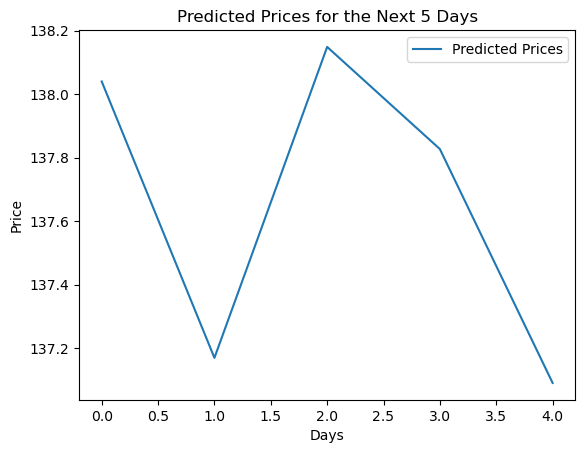

In [21]:
print("Predicted Prices for the Next 5 Days:")
print(predicted_prices)

# Plot
plt.plot(predicted_prices[0], label="Predicted Prices")
plt.title("Predicted Prices for the Next 5 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [22]:
# Create Signal Caller

threshold = 0.02  

if predicted_prices[0, 0] > (1 + threshold) * data[-1, 0]:
    signal = "Buy"
elif predicted_prices[0, 0] < (1 - threshold) * data[-1, 0]:
    signal = "Sell"
else:
    signal = "Hold"

print("Signal:", signal)

Signal: Hold
